# Which are the best and fun parts that Python can do
- Simple game
- Data analytics

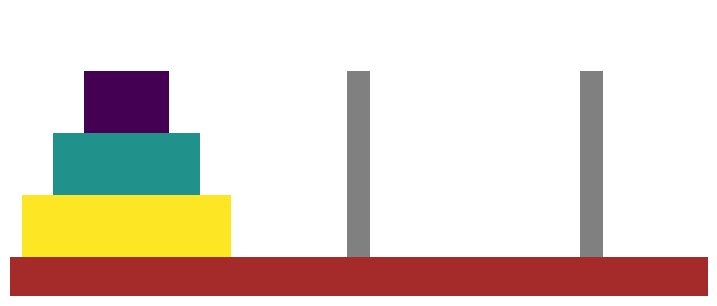

Move disk 1 from rod 1 to rod 3


<Figure size 640x480 with 0 Axes>

Move disk 2 from rod 1 to rod 2


<Figure size 640x480 with 0 Axes>

Move disk 1 from rod 3 to rod 2


<Figure size 640x480 with 0 Axes>

Move disk 3 from rod 1 to rod 3


<Figure size 640x480 with 0 Axes>

Move disk 1 from rod 2 to rod 1


<Figure size 640x480 with 0 Axes>

Move disk 2 from rod 2 to rod 3


<Figure size 640x480 with 0 Axes>

Move disk 1 from rod 1 to rod 3


<Figure size 640x480 with 0 Axes>

In [6]:
# prompt: Generate python code for Hanoi tower simulation with some graphic and 1 second delay for each movement

import time
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def draw_hanoi(ax, poles, n_disks, pole_width, base_height, disk_height):
    ax.clear()
    ax.set_xlim(0, 3 * pole_width)
    ax.set_ylim(0, n_disks * disk_height + base_height + disk_height)
    ax.set_aspect('equal')
    ax.axis('off')

    # Draw base
    ax.add_patch(patches.Rectangle((0, 0), 3 * pole_width, base_height, facecolor='brown'))

    # Draw poles
    for i in range(3):
        center_x = (i + 0.5) * pole_width
        ax.add_patch(patches.Rectangle((center_x - 0.05 * pole_width, base_height), 0.1 * pole_width, n_disks * disk_height, facecolor='gray'))

    # Draw disks
    colors = plt.cm.viridis(np.linspace(0, 1, n_disks))
    for i, pole in enumerate(poles):
        center_x = (i + 0.5) * pole_width
        for j, disk_size in enumerate(pole):
            disk_width = (disk_size / n_disks) * 0.8 * pole_width + 0.1 * pole_width
            ax.add_patch(patches.Rectangle((center_x - disk_width / 2, base_height + j * disk_height), disk_width, disk_height, facecolor=colors[disk_size - 1]))

    plt.draw()
    plt.pause(1) # 1 second delay

def tower_of_hanoi(n, source, destination, auxiliary, poles, ax, n_disks, pole_width, base_height, disk_height):
    if n == 1:
        disk = poles[source].pop()
        poles[destination].append(disk)
        print(f"Move disk 1 from rod {source+1} to rod {destination+1}")
        draw_hanoi(ax, poles, n_disks, pole_width, base_height, disk_height)
        return
    tower_of_hanoi(n-1, source, auxiliary, destination, poles, ax, n_disks, pole_width, base_height, disk_height)
    disk = poles[source].pop()
    poles[destination].append(disk)
    print(f"Move disk {n} from rod {source+1} to rod {destination+1}")
    draw_hanoi(ax, poles, n_disks, pole_width, base_height, disk_height)
    tower_of_hanoi(n-1, auxiliary, destination, source, poles, ax, n_disks, pole_width, base_height, disk_height)

def simulate_hanoi(n_disks):
    poles = [list(range(n_disks, 0, -1)), [], []]
    fig, ax = plt.subplots(figsize=(9, 6))
    pole_width = 3
    base_height = 0.5
    disk_height = 0.8

    draw_hanoi(ax, poles, n_disks, pole_width, base_height, disk_height)
    tower_of_hanoi(n_disks, 0, 2, 1, poles, ax, n_disks, pole_width, base_height, disk_height)
    plt.show()

# Example usage:
simulate_hanoi(3)

**Tick tac toe game**

In [1]:
# prompt: generate me tic tac toe game (full code) in python which can be fully run on google colab

import ipywidgets as widgets
from IPython.display import display, clear_output

# Game board
board = [' ' for _ in range(9)]

# Player symbols
player_symbols = ['X', 'O']

# Current player
current_player_index = 0

# Buttons for the game board
buttons = []
for i in range(9):
    button = widgets.Button(description=' ', layout=widgets.Layout(width='50px', height='50px'))
    button.on_click(lambda b, index=i: handle_click(index))
    buttons.append(button)

# Arrange buttons in a 3x3 grid
grid = widgets.GridBox(buttons, layout=widgets.Layout(grid_template_columns="repeat(3, 50px)"))

# Output widget to display messages
output_widget = widgets.Output()

def check_win(player):
    win_conditions = [
        (0, 1, 2), (3, 4, 5), (6, 7, 8),  # Rows
        (0, 3, 6), (1, 4, 7), (2, 5, 8),  # Columns
        (0, 4, 8), (2, 4, 6)              # Diagonals
    ]
    for condition in win_conditions:
        if board[condition[0]] == board[condition[1]] == board[condition[2]] == player:
            return True
    return False

def check_draw():
    return ' ' not in board

def reset_game():
    global board, current_player_index
    board = [' ' for _ in range(9)]
    current_player_index = 0
    for button in buttons:
        button.description = ' '
        button.disabled = False
    with output_widget:
        clear_output()
        print("New game started.")

def handle_click(index):
    global current_player_index
    if board[index] == ' ':
        board[index] = player_symbols[current_player_index]
        buttons[index].description = player_symbols[current_player_index]

        with output_widget:
            clear_output()

            if check_win(player_symbols[current_player_index]):
                print(f"Player {player_symbols[current_player_index]} wins!")
                for button in buttons:
                    button.disabled = True # Disable buttons after game ends
            elif check_draw():
                print("It's a draw!")
                for button in buttons:
                    button.disabled = True # Disable buttons after game ends
            else:
                current_player_index = (current_player_index + 1) % 2
                print(f"Player {player_symbols[current_player_index]}'s turn")
    else:
        with output_widget:
            clear_output()
            print("Invalid move. That spot is already taken.")

# Reset button
reset_button = widgets.Button(description="Reset Game")
reset_button.on_click(lambda b: reset_game())

# Initial display
display(grid, reset_button, output_widget)

with output_widget:
    print(f"Player {player_symbols[current_player_index]}'s turn")


GridBox(children=(Button(description=' ', layout=Layout(height='50px', width='50px'), style=ButtonStyle()), Bu…

Button(description='Reset Game', style=ButtonStyle())

Output()

**Data Analysis**
- Reading csv file using pandas
- Call the max, min, avg function
- Put the data in the required format for matplotlib

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5      

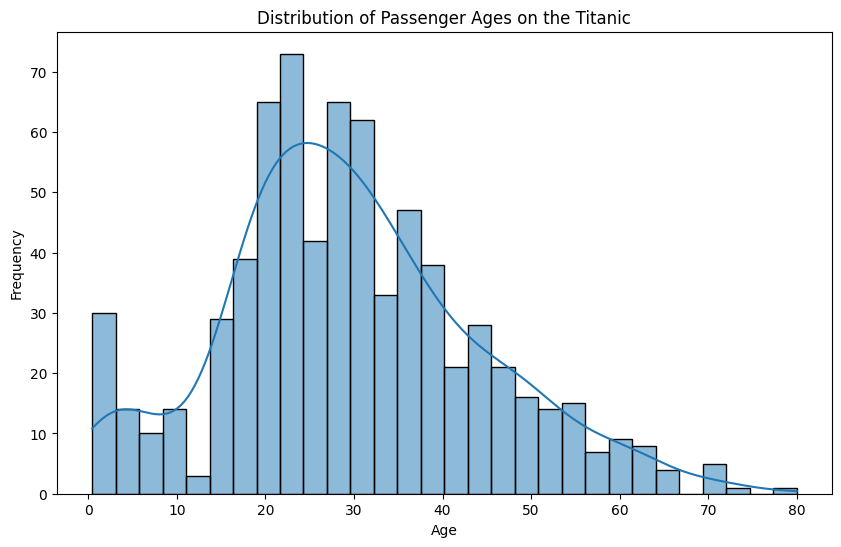


Survival Rate by Passenger Class:
Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


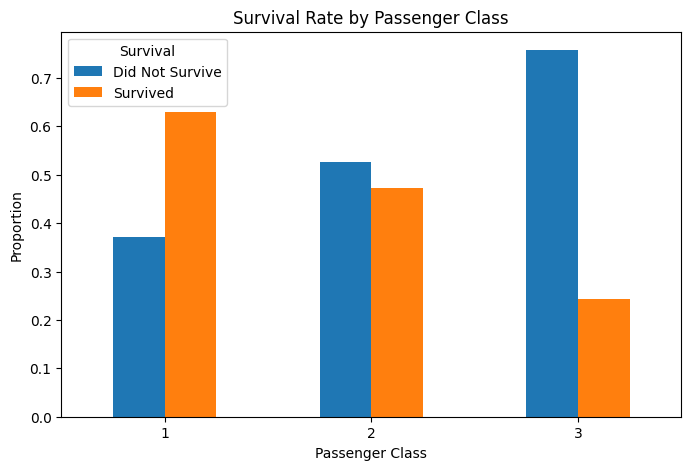

In [7]:
# prompt: Generate me an example of data analytic, read from an example csv you can find from internet, show it in a chart, show the max, min, average

!pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example: Read data from a CSV file hosted online
# Using a dataset about Titanic passengers
csv_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
try:
    df = pd.read_csv(csv_url)

    # Display basic information about the data
    print("Dataset Info:")
    df.info()
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    # Data Analysis - Example: Analyze the age of passengers
    # Drop rows with missing age values for analysis
    age_data = df.dropna(subset=['Age'])['Age']

    # Calculate descriptive statistics
    age_max = age_data.max()
    age_min = age_data.min()
    age_mean = age_data.mean()

    print(f"\nAge Analysis:")
    print(f"  Maximum Age: {age_max:.2f}")
    print(f"  Minimum Age: {age_min:.2f}")
    print(f"  Average Age: {age_mean:.2f}")

    # Visualization: Distribution of passenger ages
    plt.figure(figsize=(10, 6))
    sns.histplot(age_data, kde=True, bins=30)
    plt.title('Distribution of Passenger Ages on the Titanic')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()

    # Example 2: Survival rate by Pclass
    survival_by_pclass = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()

    print("\nSurvival Rate by Passenger Class:")
    print(survival_by_pclass)

    survival_by_pclass.plot(kind='bar', stacked=False, figsize=(8, 5))
    plt.title('Survival Rate by Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Proportion')
    plt.xticks(rotation=0)
    plt.legend(['Did Not Survive', 'Survived'], title='Survival')
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
    print("Please ensure the URL is correct and accessible, and that you have an internet connection.")

**Simulation**
- Using turtle library

In [8]:
# prompt: generate Example of python turtle with full code, please use the latest

!pip install ColabTurtle

import ColabTurtle.Turtle as turtle

# Set up the turtle screen
turtle.initializeTurtle()
turtle.speed(5) # Set the drawing speed (0 is fastest, 1 is slowest)

# Example: Draw a square
turtle.forward(100) # Move forward 100 units
turtle.left(90)     # Turn left 90 degrees
turtle.forward(100)
turtle.left(90)
turtle.forward(100)
turtle.left(90)
turtle.forward(100)
turtle.left(90)

# Example: Draw a star
turtle.penup()      # Lift the pen to move without drawing
turtle.goto(100, 250) # Move to a new position
turtle.pendown()    # Put the pen down to draw

turtle.color("red") # Set the pen color

for _ in range(5):
  turtle.forward(200)
  turtle.right(144)


# Hide the turtle when done (optional)
# turtle.hideturtle()


  Preparing metadata (setup.py) ... done
  Created wheel for ColabTurtle: filename=ColabTurtle-2.1.0-py3-none-any.whl size=7643 sha256=0623b5474de9fd68f776098af1ed576c0cdb5f924c69316c6fc4c1fdaf696016
  Stored in directory: /root/.cache/pip/wheels/f6/9e/81/137e7da25129474562d30f8660be599e5c8d79228cb747e5b9
Successfully built ColabTurtle


# Basic variable assignments
- No need to declare the data type of python => Just need to assign

In [9]:
x = 5
y = "John"
print(x)
print(y)

5
John


# Array
- Simply define by a = [ ]

In [10]:
thislist = ["apple", "banana", "cherry"]
print(thislist)

['apple', 'banana', 'cherry']


# While loop

In [11]:
i = 1
while i < 6:
  print(i)
  i += 1

1
2
3
4
5


# For Loop

In [12]:
fruits = ["apple", "banana", "cherry"]
for x in fruits:
  print(x)

print('--------------')

for x in range(2, 30, 3):
  print(x)

apple
banana
cherry
--------------
2
5
8
11
14
17
20
23
26
29


In [13]:
cars = ["Ford", "Volvo", "BMW"]

print(cars[0])
print(len(cars))

Ford
3


# Define a function

In [ ]:
def my_function():
  print("Hello from a function")

my_function()

Hello from a function


# Condition

In [14]:
a = 33
b = 200
if b > a:
  print("b is greater than a")

b is greater than a


# OpenCV library and Numpy library

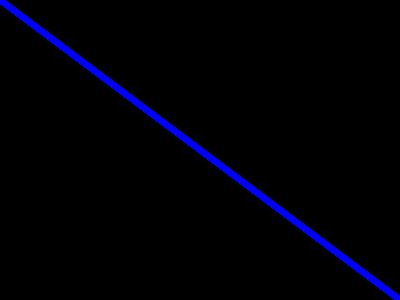

True

In [15]:
# prompt: example of opencv and numpy

!pip install opencv-python numpy

import cv2
import numpy as np

# Create a black image
image = np.zeros((300, 400, 3), np.uint8)

# Draw a blue line
cv2.line(image, (0, 0), (400, 300), (255, 0, 0), 5)

# Display the image (optional, for Colab)
from google.colab.patches import cv2_imshow
cv2_imshow(image)

# Save image (optional)
cv2.imwrite('line_image.jpg', image)


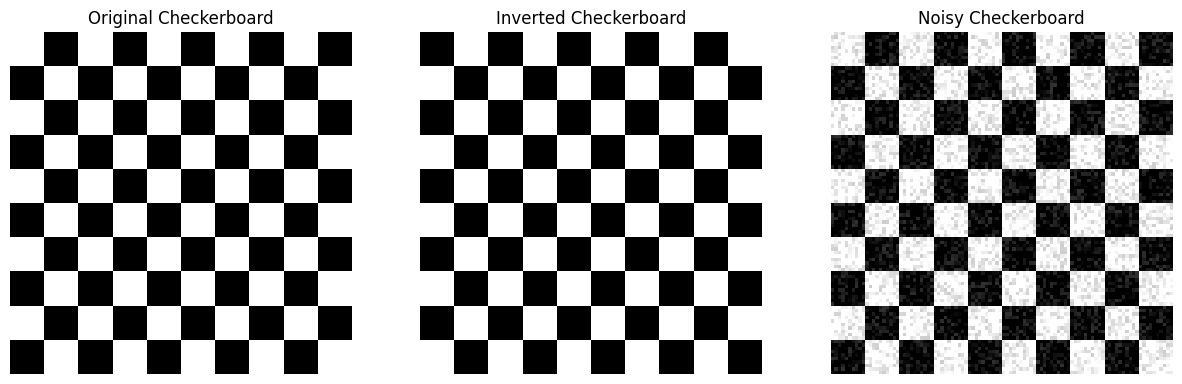

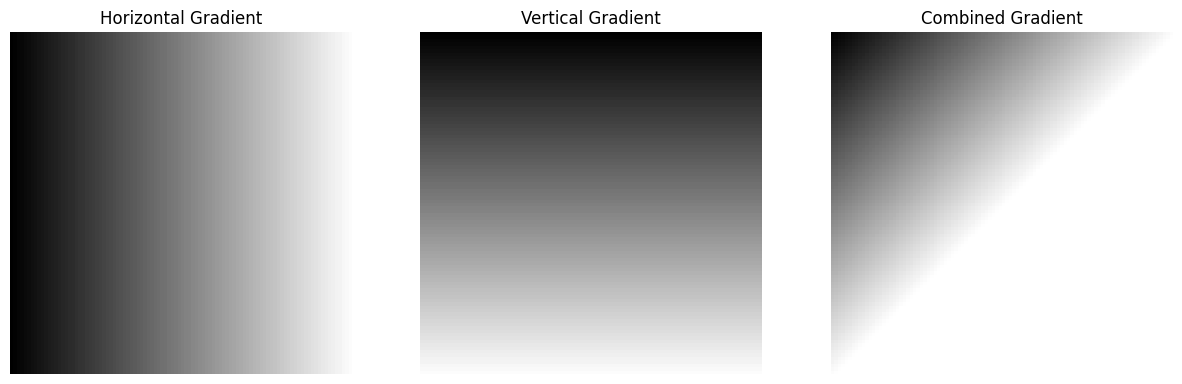

In [17]:
# prompt: python example for numpy library in advance and show images on matplotlib

import matplotlib.pyplot as plt
import numpy as np
# Advanced NumPy Example: Creating and manipulating a 2D array (image-like data)
# Using NumPy for array operations and Matplotlib to visualize

# Create a 2D NumPy array representing a grayscale image
# A checkerboard pattern as an example
image_size = 100
checkerboard = np.zeros((image_size, image_size), dtype=np.uint8)

# Create the pattern
for i in range(image_size):
    for j in range(image_size):
        if (i // 10 + j // 10) % 2 == 0:
            checkerboard[i, j] = 255 # White squares

# Perform some basic NumPy operations
# Invert the colors
inverted_checkerboard = 255 - checkerboard

# Add some noise (random values)
noise = np.random.randint(-50, 50, size=(image_size, image_size), dtype=np.int16)
noisy_checkerboard = np.clip(checkerboard + noise, 0, 255).astype(np.uint8) # Add noise and clip values

# Visualize the original, inverted, and noisy images using Matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(checkerboard, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Checkerboard')
axes[0].axis('off')

axes[1].imshow(inverted_checkerboard, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Inverted Checkerboard')
axes[1].axis('off')

axes[2].imshow(noisy_checkerboard, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Noisy Checkerboard')
axes[2].axis('off')

plt.show()

# More advanced NumPy example: Creating a gradient image
gradient_image = np.zeros((image_size, image_size), dtype=np.uint8)

# Create a horizontal gradient
for i in range(image_size):
    gradient_image[:, i] = int(255 * (i / image_size))

# Create a vertical gradient
vertical_gradient = np.zeros((image_size, image_size), dtype=np.uint8)
for i in range(image_size):
    vertical_gradient[i, :] = int(255 * (i / image_size))

# Combine gradients (example: sum and normalize)
combined_gradient = np.clip(gradient_image.astype(np.int16) + vertical_gradient.astype(np.int16), 0, 255).astype(np.uint8)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(gradient_image, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Horizontal Gradient')
axes[0].axis('off')

axes[1].imshow(vertical_gradient, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Vertical Gradient')
axes[1].axis('off')

axes[2].imshow(combined_gradient, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Combined Gradient')
axes[2].axis('off')

plt.show()

# Matplotlib library

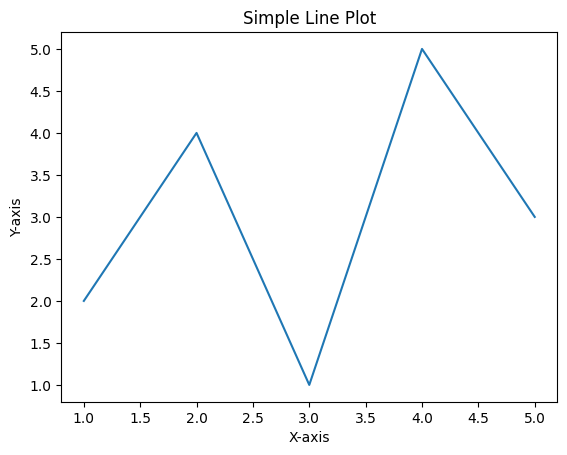

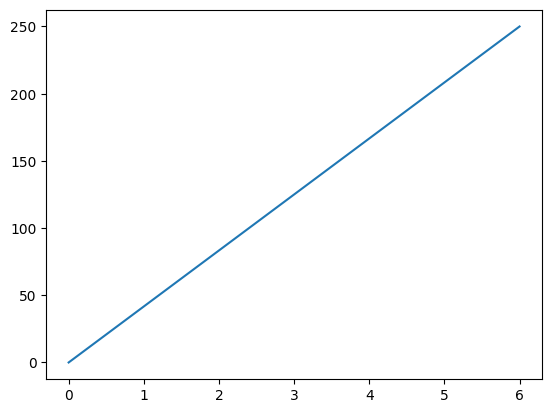

In [18]:
# prompt: Example matplotlib

import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 1, 5, 3]

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Simple Line Plot")

# Display the plot
plt.show()

xpoints = np.array([0, 6])
ypoints = np.array([0, 250])

plt.plot(xpoints, ypoints)
plt.show()


# Scipy Library

Fitted parameters: a = 1.03, b = -0.01


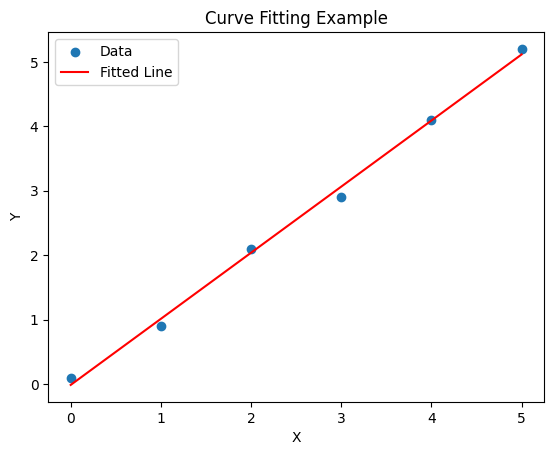

In [19]:
# prompt: example of scipy

import numpy as np
from scipy.optimize import curve_fit

# Sample data (replace with your actual data)
x_data = np.array([0, 1, 2, 3, 4, 5])
y_data = np.array([0.1, 0.9, 2.1, 2.9, 4.1, 5.2])


# Define the fitting function (example: linear function)
def linear_function(x, a, b):
  return a * x + b

# Perform curve fitting
params, covariance = curve_fit(linear_function, x_data, y_data)

# Extract fitted parameters
a_fit, b_fit = params

print(f"Fitted parameters: a = {a_fit:.2f}, b = {b_fit:.2f}")


# Generate fitted data points
y_fit = linear_function(x_data, a_fit, b_fit)

# Plot the results
import matplotlib.pyplot as plt
plt.scatter(x_data, y_data, label="Data")
plt.plot(x_data, y_fit, color='red', label="Fitted Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Curve Fitting Example")
plt.show()


Accuracy: 1.0


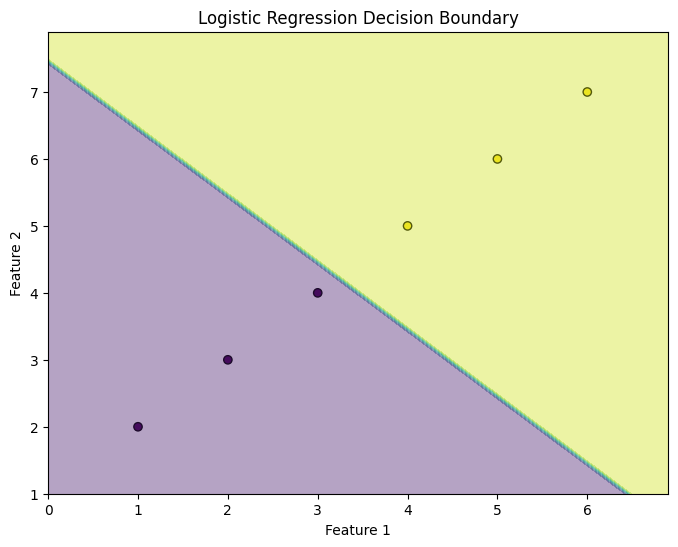

In [20]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Sample data (replace with your actual data)
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6,7]])  # Features
y = np.array([0, 0, 0, 1, 1, 1])  # Labels (binary classification)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#Decision Boundary visualization (for 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')  # Plot the data points

# Create a meshgrid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.show()



Model Accuracy on Test Data: 0.94


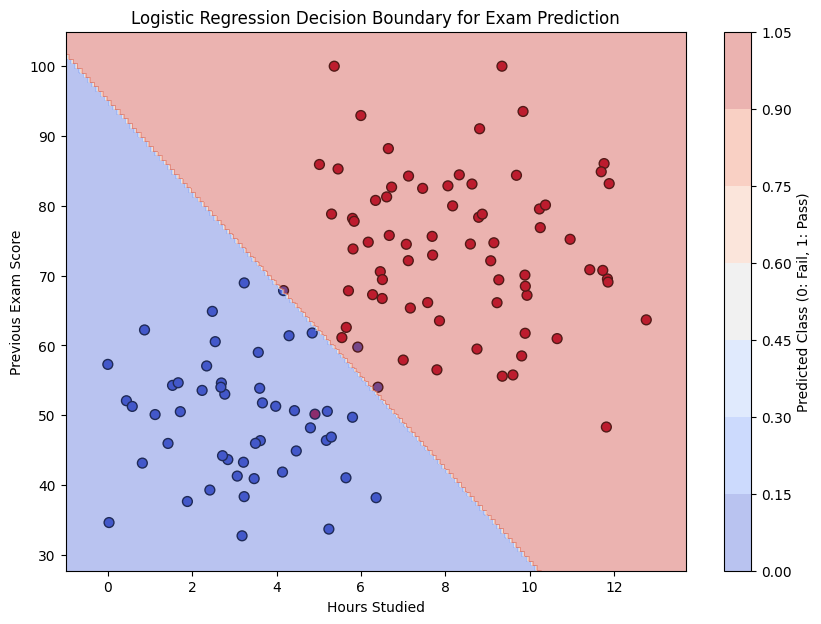


Explanation of the Decision Boundary:
The scatter plot shows individual student data points. Red points represent students who Failed (class 0), and blue points represent students who Passed (class 1).
The colored background represents the regions where the Logistic Regression model predicts either 'Fail' or 'Pass'.
The boundary between the red and blue regions is the Decision Boundary. This straight line is where the model's predicted probability of passing is approximately 0.5.
Points on one side of the line are predicted to be in one class, and points on the other side are predicted to be in the other class.
For this scenario, students with higher 'Hours Studied' and/or higher 'Previous Exam Score' are more likely to fall into the 'Pass' region (blue), and vice-versa.
The line shows the combination of 'Hours Studied' and 'Previous Exam Score' where the model is uncertain or transitions its prediction.


In [21]:
# prompt: generate me a sklearn example wiht real life situation for logistic regression decision boundary and explain

import matplotlib.pyplot as plt
import numpy as np
# Generate synthetic data for the exam scenario
# Feature 1: Hours Studied
# Feature 2: Previous Exam Score
# Target: Pass (1) or Fail (0)

np.random.seed(0) # for reproducibility

# Generate data for students who failed (generally fewer hours, lower previous scores)
n_failed = 50
hours_failed = np.random.normal(loc=3, scale=1.5, size=n_failed)
previous_score_failed = np.random.normal(loc=50, scale=10, size=n_failed)
failed_labels = np.zeros(n_failed)

# Generate data for students who passed (generally more hours, higher previous scores)
n_passed = 70
hours_passed = np.random.normal(loc=8, scale=2, size=n_passed)
previous_score_passed = np.random.normal(loc=75, scale=12, size=n_passed)
passed_labels = np.ones(n_passed)

# Combine the data
X_hours = np.concatenate((hours_failed, hours_passed)).reshape(-1, 1)
X_previous = np.concatenate((previous_score_failed, previous_score_passed)).reshape(-1, 1)
X = np.hstack((X_hours, X_previous)) # Combine features into a single array
y = np.concatenate((failed_labels, passed_labels))

# Ensure all values are non-negative and within a reasonable range
X[:, 0] = np.clip(X[:, 0], 0, 15) # Hours studied
X[:, 1] = np.clip(X[:, 1], 0, 100) # Previous exam score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy on Test Data: {accuracy:.2f}")

# Decision Boundary visualization
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=50)  # Plot the data points

# Create a meshgrid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the meshgrid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary as a contour
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

plt.xlabel("Hours Studied")
plt.ylabel("Previous Exam Score")
plt.title("Logistic Regression Decision Boundary for Exam Prediction")
plt.colorbar(label='Predicted Class (0: Fail, 1: Pass)')
plt.show()

print("\nExplanation of the Decision Boundary:")
print("The scatter plot shows individual student data points. Red points represent students who Failed (class 0), and blue points represent students who Passed (class 1).")
print("The colored background represents the regions where the Logistic Regression model predicts either 'Fail' or 'Pass'.")
print("The boundary between the red and blue regions is the Decision Boundary. This straight line is where the model's predicted probability of passing is approximately 0.5.")
print("Points on one side of the line are predicted to be in one class, and points on the other side are predicted to be in the other class.")
print("For this scenario, students with higher 'Hours Studied' and/or higher 'Previous Exam Score' are more likely to fall into the 'Pass' region (blue), and vice-versa.")
print("The line shows the combination of 'Hours Studied' and 'Previous Exam Score' where the model is uncertain or transitions its prediction.")
